In [3]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from prophet import Prophet
plt.style.use('fivethirtyeight')

In [4]:
##install and import pandasdatareader
!pip install pandas_datareader
from pandas_datareader import data as pdr
##install and import yfinance
!pip install yfinance
import yfinance as yfin
yfin.pdr_override()

In [5]:
#load lickers variable for Coca Cola
ticker = ['KO'] ##KO

In [6]:
ticker = 'KO'
##Set start and end date
start_date = '2000-04-04'
end_date = '2023-04-04'

In [7]:
##Import and read data
df_yf = pd.read_csv(f"https://query1.finance.yahoo.com/v7/finance/download/{ticker}?period1={int(pd.to_datetime(start_date).timestamp())}&period2={int(pd.to_datetime(end_date).timestamp())}&interval=1d&events=history&includeAdjustedClose=true")

In [8]:
df_yf

Date       Open       High        Low      Close  Adj Close  \
0     2000-04-04  24.656250  26.187500  24.093750  26.187500  13.889461   
1     2000-04-05  25.468750  25.468750  23.687500  23.812500  12.629798   
2     2000-04-06  23.812500  23.968750  22.375000  22.875000  12.132561   
3     2000-04-07  22.875000  23.218750  22.375000  23.093750  12.248581   
4     2000-04-10  23.093750  23.593750  22.437500  22.500000  11.933662   
...          ...        ...        ...        ...        ...        ...   
5781  2023-03-28  61.389999  61.740002  61.270000  61.419998  61.419998   
5782  2023-03-29  61.720001  61.950001  61.590000  61.860001  61.860001   
5783  2023-03-30  61.880001  62.090000  61.660000  61.849998  61.849998   
5784  2023-03-31  62.060001  62.250000  61.869999  62.029999  62.029999   
5785  2023-04-03  62.299999  62.520000  61.860001  62.400002  62.400002   

        Volume  
0     27390200  
1     20256600  
2     20675000  
3     12374000  
4     12903000  
...        ...  
5781  10925700  
5782   9441000  
5783   9870700  
5784  14439400  
5785  12300700  

[5786 rows x 7 columns]

In [9]:
# Renaming columns of the dataframe df_yf to 'ds' and 'y'
df_yf = df_yf.rename(columns={'Date': 'ds', 'Adj Close': 'y'})

In [10]:
# Converting the 'ds' column of the dataframe df_yf to datetime format
df_yf['ds'] = pd.to_datetime(df_yf['ds'])

In [11]:
# Creating an instance of the Prophet class and fitting it to the dataframe df_yf
m = Prophet()
m.fit(df_yf)

20:27:06 - cmdstanpy - INFO - Chain [1] start processing
20:27:10 - cmdstanpy - INFO - Chain [1] done processing


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

ds
6146 2024-03-29
6147 2024-03-30
6148 2024-03-31
6149 2024-04-01
6150 2024-04-02

In [13]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
6146 2024-03-29  65.909820   63.282363   68.485889
6147 2024-03-30  65.350433   62.756536   68.060721
6148 2024-03-31  65.401391   62.820562   68.046134
6149 2024-04-01  66.044265   63.223296   68.473422
6150 2024-04-02  66.111545   63.518239   68.610010

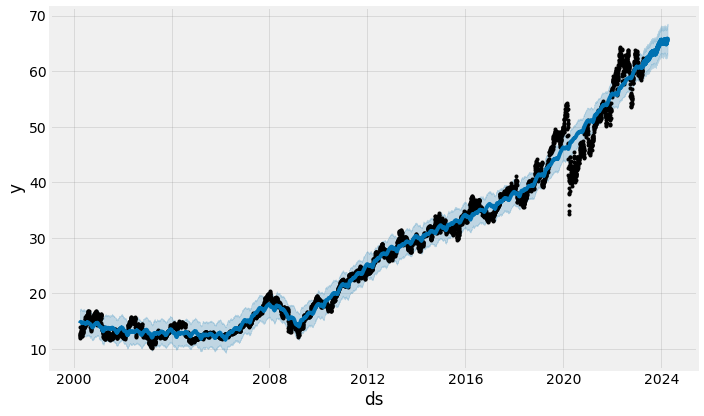

In [14]:
# Plotting the forecasted values using the plot() method of the Prophet class
fig1 = m.plot(forecast)

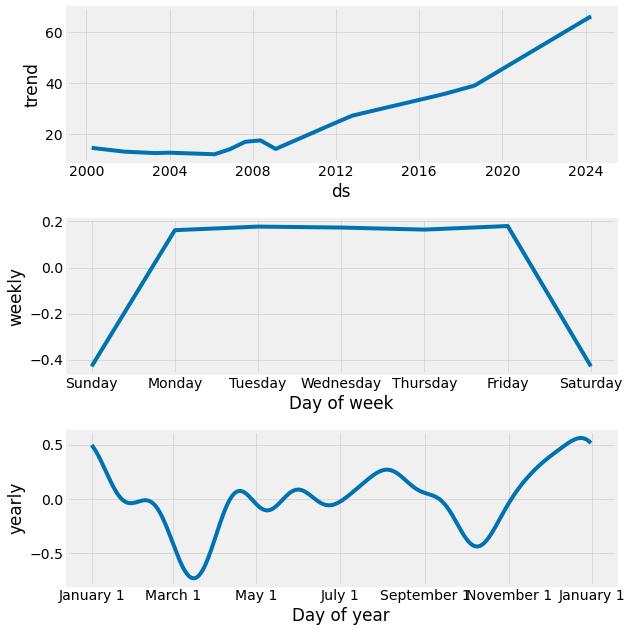

In [15]:
# Plotting the forecasted values
fig2 = m.plot_components(forecast)

In [16]:
# Importing the necessary libraries and plotting the forecasted values using the plot_plotly() function
from prophet.plot import plot_plotly, plot_components_plotly
import plotly.offline as py
import plotly.graph_objs as go

plot_plotly(m, forecast)

In [17]:
# Importing the necessary libraries and plotting the forecasted components using the plot_components_plotly() function
plot_components_plotly(m, forecast)